# **Importing Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

import io

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
drive.mount('/content/drive')
path = "/content/drive/MyDrive/fifa/dataset.csv"

df = pd.read_csv(path)

pd.set_option('display.max_columns',None)

Mounted at /content/drive


In [ ]:
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21


# **Dropping Unwanted Columns**

In [ ]:
df = df.drop([
    'Known As','Overall','Potential','Value(in Euro)','Positions Played','Nationality','Image Link',
    'Height(in cm)','Weight(in kg)','TotalStats','BaseStats','Wage(in Euro)','Release Clause','Contract Until','Club Jersey Number','Joined On','On Loan','Preferred Foot','Weak Foot Rating','Skill Moves','International Reputation','National Team Image Link','National Team Jersey Number','Attacking Work Rate','Defensive Work Rate',
    'ST Rating','LW Rating','LF Rating','CF Rating','RF Rating','RW Rating','CAM Rating','LM Rating','CM Rating','RM Rating','LWB Rating','CDM Rating','RWB Rating','LB Rating','CB Rating','RB Rating','GK Rating'
],axis=1)

In [ ]:
df.head()

,Full Name,Best Position,Age,Club Name,Club Position,National Team Name,National Team Position,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes
0,Lionel Messi,CAM,35,Paris Saint-Germain,RW,Argentina,RW,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8
1,Karim Benzema,CF,34,Real Madrid CF,CF,France,ST,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7
2,Robert Lewandowski,ST,33,FC Barcelona,ST,Poland,ST,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10
3,Kevin De Bruyne,CM,31,Manchester City,CM,Belgium,RF,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13
4,Kylian Mbappé,ST,23,Paris Saint-Germain,ST,France,ST,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6


In [ ]:
df.shape

(18539, 47)

In [ ]:
df.isnull().sum()

Full Name                 0
Best Position             0
Age                       0
Club Name                 0
Club Position             0
National Team Name        0
National Team Position    0
Pace Total                0
Shooting Total            0
Passing Total             0
Dribbling Total           0
Defending Total           0
Physicality Total         0
Crossing                  0
Finishing                 0
Heading Accuracy          0
Short Passing             0
Volleys                   0
Dribbling                 0
Curve                     0
Freekick Accuracy         0
LongPassing               0
BallControl               0
Acceleration              0
Sprint Speed              0
Agility                   0
Reactions                 0
Balance                   0
Shot Power                0
Jumping                   0
Stamina                   0
Strength                  0
Long Shots                0
Aggression                0
Interceptions             0
Positioning         

In [ ]:
df = df[~df['Club Position'].str.contains('-')]
df = df[~df['Club Position'].str.contains('SUB')]
df = df[~df['Club Position'].str.contains('RES')]


In [ ]:
df['Club Position'].value_counts()


CB     1555
CM      993
ST      878
GK      673
CDM     627
LB      486
RB      485
RM      384
LM      380
CAM     270
RW      186
LW      186
LWB     137
RWB     135
RF       28
LF       25
CF       11
Name: Club Position, dtype: int64

In [ ]:
attack = dict.fromkeys(['ST','LW','RW','LF','RF','CF'],'Attacker')
mid = dict.fromkeys(['CM','RM','LM','CAM','CDM',],'Midfielder')
defence = dict.fromkeys(['CB','LB','RB','LWB','RWB'],'Defence')
df['Club Position'].replace('GK','Goalkeeper',inplace=True)
df['Club Position'].replace(attack,inplace=True)
df['Club Position'].replace(mid,inplace=True)
df['Club Position'].replace(defence,inplace=True)

df['Club Position'].value_counts()

Defence       2798
Midfielder    2654
Attacker      1314
Goalkeeper     673
Name: Club Position, dtype: int64

In [ ]:
df.duplicated('Full Name').sum()

83

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated('Full Name').head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [ ]:
df.head()

,Full Name,Best Position,Age,Club Name,Club Position,National Team Name,National Team Position,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes
0,Lionel Messi,CAM,35,Paris Saint-Germain,Attacker,Argentina,RW,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8
1,Karim Benzema,CF,34,Real Madrid CF,Attacker,France,ST,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7
2,Robert Lewandowski,ST,33,FC Barcelona,Attacker,Poland,ST,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10
3,Kevin De Bruyne,CM,31,Manchester City,Midfielder,Belgium,RF,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13
4,Kylian Mbappé,ST,23,Paris Saint-Germain,Attacker,France,ST,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6


# **Data Exploration**

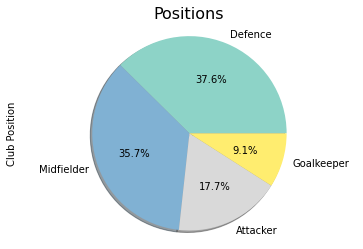

In [ ]:
df['Club Position'].value_counts().plot(kind='pie',autopct="%0.1f%%",shadow=True,cmap='Set3')
plt.title("Positions",fontsize=16)
plt.axis('equal')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


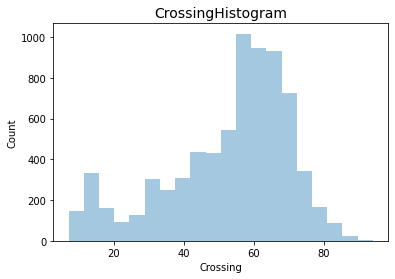

Crossing
count    7370.000000
mean       52.784668
std        17.668182
min         7.000000
25%        43.000000
50%        58.000000
75%        65.000000
max        94.000000
Name: Crossing, dtype: float64





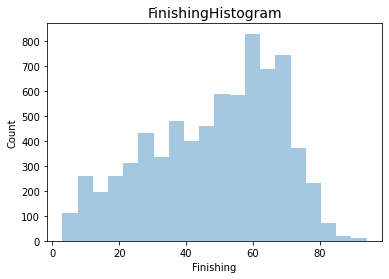

Finishing
count    7370.000000
mean       48.581547
std        19.382738
min         3.000000
25%        34.000000
50%        52.000000
75%        64.000000
max        94.000000
Name: Finishing, dtype: float64





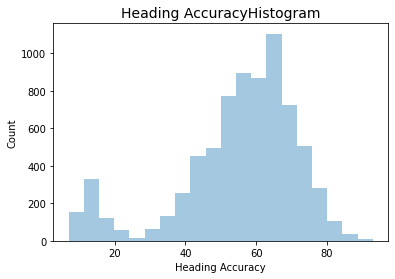

Heading Accuracy
count    7370.000000
mean       55.132836
std        16.888469
min         7.000000
25%        48.000000
50%        58.000000
75%        67.000000
max        93.000000
Name: Heading Accuracy, dtype: float64





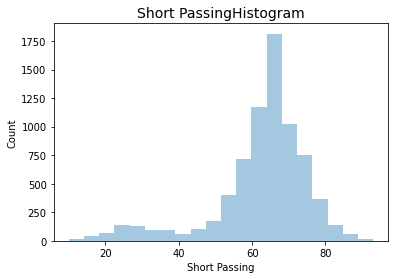

Short Passing
count    7370.000000
mean       62.524966
std        13.040579
min        10.000000
25%        59.000000
50%        65.000000
75%        70.000000
max        93.000000
Name: Short Passing, dtype: float64





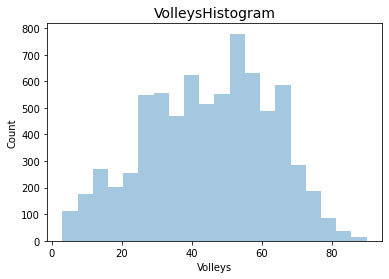

Volleys
count    7370.000000
mean       44.857802
std        17.781377
min         3.000000
25%        32.000000
50%        46.000000
75%        59.000000
max        90.000000
Name: Volleys, dtype: float64





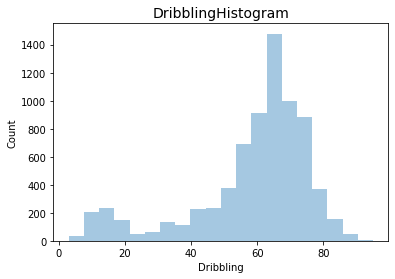

Dribbling
count    7370.000000
mean       58.630258
std        17.782897
min         3.000000
25%        54.000000
50%        63.000000
75%        70.000000
max        95.000000
Name: Dribbling, dtype: float64





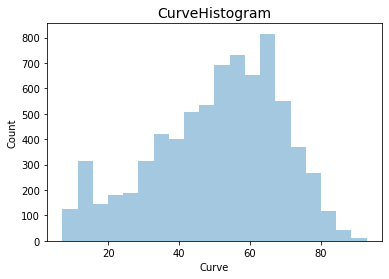

Curve
count    7370.000000
mean       50.796744
std        18.030844
min         7.000000
25%        39.000000
50%        54.000000
75%        64.000000
max        93.000000
Name: Curve, dtype: float64





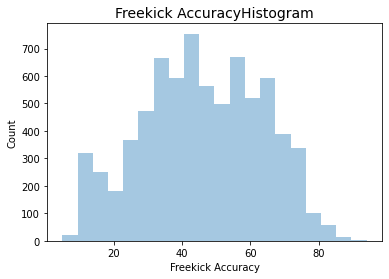

Freekick Accuracy
count    7370.000000
mean       45.967843
std        17.589217
min         5.000000
25%        33.000000
50%        46.000000
75%        60.000000
max        94.000000
Name: Freekick Accuracy, dtype: float64





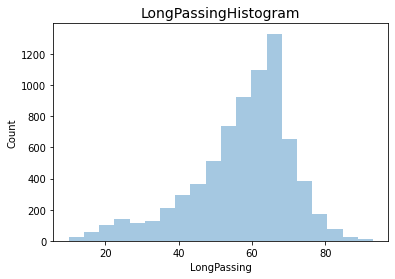

LongPassing
count    7370.000000
mean       57.314654
std        13.579215
min        10.000000
25%        51.000000
50%        60.000000
75%        66.000000
max        93.000000
Name: LongPassing, dtype: float64





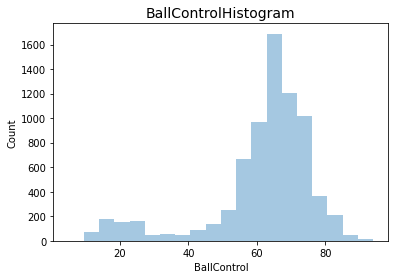

BallControl
count    7370.000000
mean       61.786296
std        15.317646
min         5.000000
25%        58.000000
50%        65.000000
75%        71.000000
max        94.000000
Name: BallControl, dtype: float64





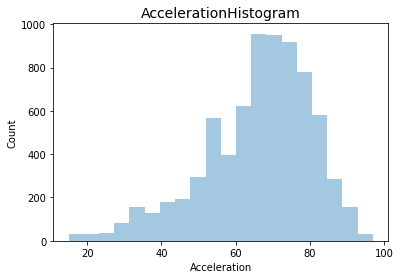

Acceleration
count    7370.000000
mean       66.114383
std        14.558256
min        15.000000
25%        58.000000
50%        69.000000
75%        76.000000
max        97.000000
Name: Acceleration, dtype: float64





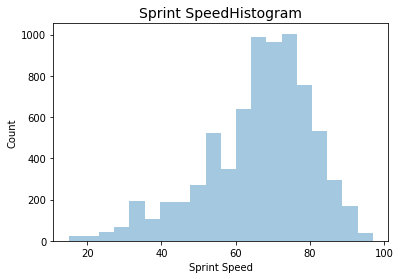

Sprint Speed
count    7370.000000
mean       66.366214
std        14.441014
min        15.000000
25%        59.000000
50%        69.000000
75%        76.000000
max        97.000000
Name: Sprint Speed, dtype: float64





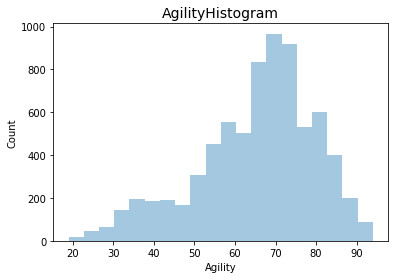

Agility
count    7370.000000
mean       65.243691
std        14.559299
min        19.000000
25%        57.000000
50%        68.000000
75%        75.000000
max        94.000000
Name: Agility, dtype: float64





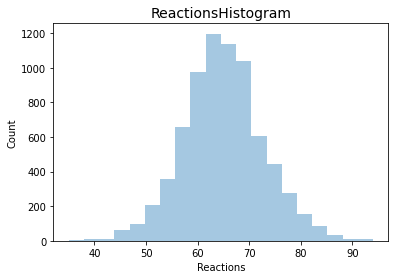

Reactions
count    7370.000000
mean       65.035550
std         7.841148
min        35.000000
25%        60.000000
50%        65.000000
75%        70.000000
max        94.000000
Name: Reactions, dtype: float64





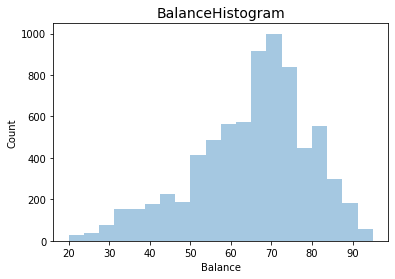

Balance
count    7370.000000
mean       65.048711
std        14.232371
min        20.000000
25%        57.000000
50%        67.000000
75%        75.000000
max        95.000000
Name: Balance, dtype: float64





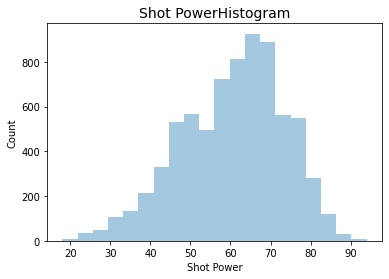

Shot Power
count    7370.000000
mean       60.455631
std        12.819297
min        18.000000
25%        52.000000
50%        62.000000
75%        70.000000
max        94.000000
Name: Shot Power, dtype: float64





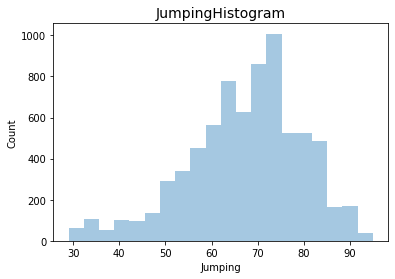

Jumping
count    7370.000000
mean       67.315875
std        12.394150
min        29.000000
25%        60.000000
50%        69.000000
75%        76.000000
max        95.000000
Name: Jumping, dtype: float64





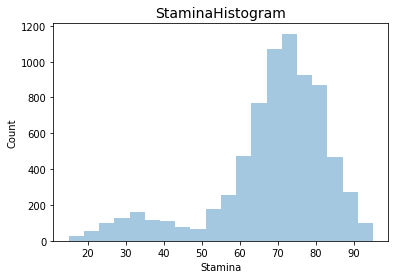

Stamina
count    7370.000000
mean       67.939349
std        15.131799
min        15.000000
25%        63.000000
50%        71.000000
75%        78.000000
max        95.000000
Name: Stamina, dtype: float64





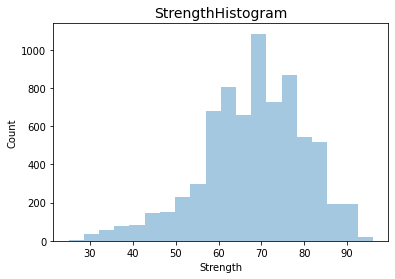

Strength
count    7370.000000
mean       68.200000
std        11.994442
min        25.000000
25%        61.000000
50%        69.000000
75%        77.000000
max        96.000000
Name: Strength, dtype: float64





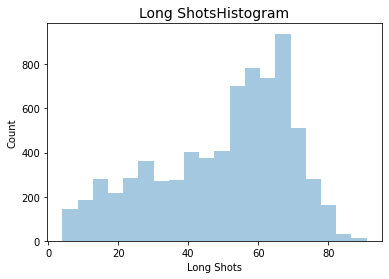

Long Shots
count    7370.000000
mean       49.952646
std        19.250787
min         4.000000
25%        36.000000
50%        55.000000
75%        65.000000
max        91.000000
Name: Long Shots, dtype: float64





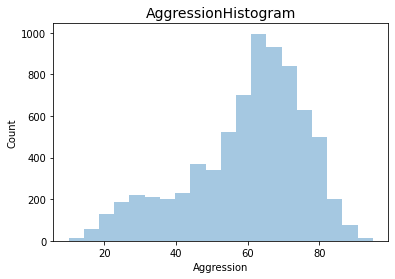

Aggression
count    7370.000000
mean       59.764315
std        16.291189
min        10.000000
25%        51.000000
50%        63.000000
75%        71.000000
max        95.000000
Name: Aggression, dtype: float64





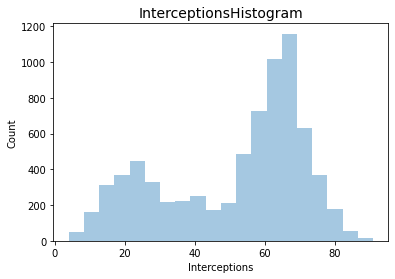

Interceptions
count    7370.000000
mean       51.527951
std        20.091232
min         4.000000
25%        34.000000
50%        59.000000
75%        67.000000
max        91.000000
Name: Interceptions, dtype: float64





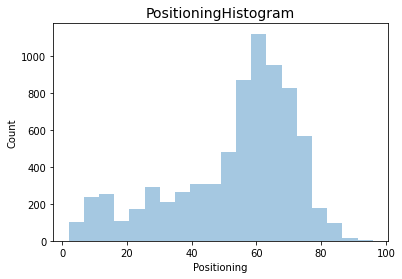

Positioning
count    7370.000000
mean       53.343826
std        19.269418
min         2.000000
25%        43.000000
50%        59.000000
75%        67.000000
max        96.000000
Name: Positioning, dtype: float64





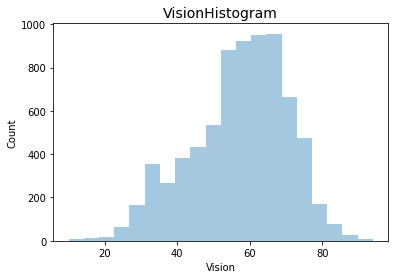

Vision
count    7370.000000
mean       57.126187
std        13.348226
min        10.000000
25%        48.000000
50%        59.000000
75%        67.000000
max        94.000000
Name: Vision, dtype: float64





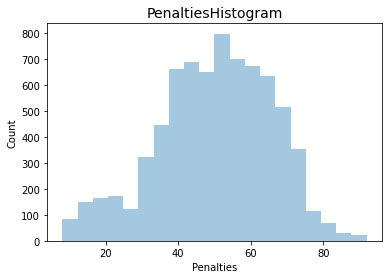

Penalties
count    7370.000000
mean       50.053053
std        15.709537
min         8.000000
25%        40.000000
50%        51.000000
75%        62.000000
max        92.000000
Name: Penalties, dtype: float64





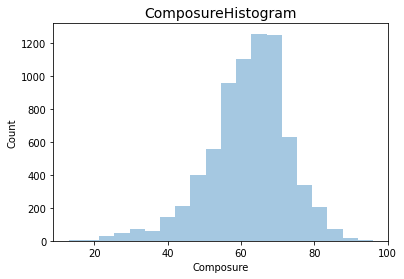

Composure
count    7370.000000
mean       61.874763
std        10.897451
min        13.000000
25%        56.000000
50%        63.000000
75%        69.000000
max        96.000000
Name: Composure, dtype: float64





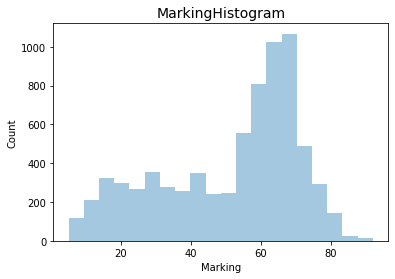

Marking
count    7370.000000
mean       51.290909
std        19.772283
min         5.000000
25%        35.000000
50%        59.000000
75%        66.000000
max        92.000000
Name: Marking, dtype: float64





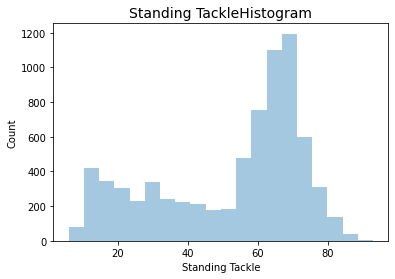

Standing Tackle
count    7370.000000
mean       52.543148
std        20.821508
min         6.000000
25%        35.000000
50%        61.000000
75%        68.000000
max        93.000000
Name: Standing Tackle, dtype: float64





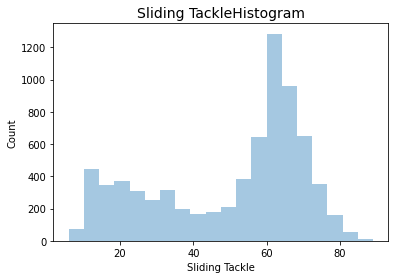

Sliding Tackle
count    7370.000000
mean       50.061194
std        20.509547
min         6.000000
25%        31.000000
50%        58.000000
75%        66.000000
max        89.000000
Name: Sliding Tackle, dtype: float64





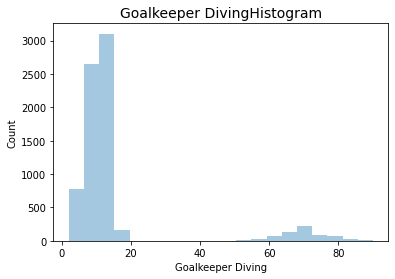

Goalkeeper Diving
count    7370.000000
mean       15.788195
std        17.417617
min         2.000000
25%         8.000000
50%        11.000000
75%        14.000000
max        90.000000
Name: Goalkeeper Diving, dtype: float64





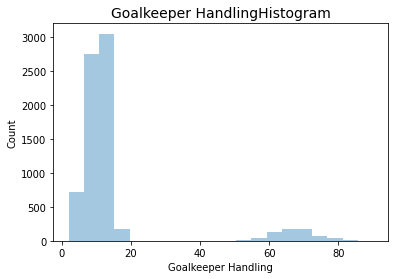

Goalkeeper Handling
count    7370.000000
mean       15.570285
std        16.749761
min         2.000000
25%         8.000000
50%        11.000000
75%        14.000000
max        90.000000
Name: Goalkeeper Handling, dtype: float64





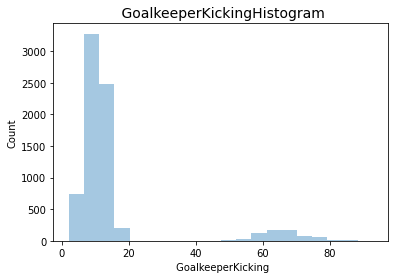

 GoalkeeperKicking
count    7370.000000
mean       15.500678
std        16.334775
min         2.000000
25%         8.000000
50%        11.000000
75%        14.000000
max        93.000000
Name:  GoalkeeperKicking, dtype: float64





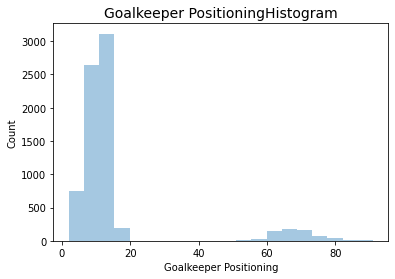

Goalkeeper Positioning
count    7370.000000
mean       15.721438
std        17.075849
min         2.000000
25%         8.000000
50%        11.000000
75%        14.000000
max        91.000000
Name: Goalkeeper Positioning, dtype: float64





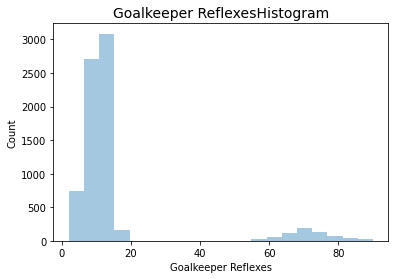

Goalkeeper Reflexes
count    7370.000000
mean       15.901357
std        17.804381
min         2.000000
25%         8.000000
50%        11.000000
75%        14.000000
max        90.000000
Name: Goalkeeper Reflexes, dtype: float64





In [ ]:
for col in df.iloc[:,13:]:
  sns.distplot(df[col],kde=False,bins=20)
  plt.title(str(df[col].name)+'Histogram',fontsize=14)
  plt.ylabel("Count")
  plt.show()
  print(df[col].name)
  print(df[col].describe())
  print("\n\n")

# **KNN**

In [ ]:
feature_cols = ['Crossing','Finishing','Heading Accuracy','Short Passing','Volleys','Dribbling',
                'Curve','Freekick Accuracy','LongPassing','BallControl','Acceleration','Sprint Speed',
                'Agility','Reactions','Balance','Shot Power','Jumping','Stamina','Strength','Long Shots','Aggression',
                'Interceptions','Positioning','Vision','Penalties','Composure','Marking','Standing Tackle','Sliding Tackle']

X = df[feature_cols]

y=df['Club Position']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1984)

knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='minkowski',p=2)

fit = knn.fit(X_train,y_train)


y_pred = fit.predict(X_test)


accuracy = metrics.accuracy_score(y_test,y_pred)

err = np.mean(y_pred != y_test)

print("Model Accuracy:",str(round(accuracy*100,2)),"%")
print("Model Error Rate:",str(round(err*100,2)),"%")
print("\n\nClassification Report\n\n",classification_report(y_test,y_pred))

Model Accuracy: 81.61 %
Model Error Rate: 18.39 %


Classification Report

               precision    recall  f1-score   support

    Attacker       0.69      0.71      0.70       269
     Defence       0.91      0.88      0.90       565
  Goalkeeper       1.00      1.00      1.00       125
  Midfielder       0.74      0.76      0.75       515

    accuracy                           0.82      1474
   macro avg       0.84      0.84      0.84      1474
weighted avg       0.82      0.82      0.82      1474



In [ ]:
testdata = X_test
testdata.shape
testdata['Original Posn'] = y_test
testdata['Pred Posn'] = y_pred
testdata

,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Original Posn,Pred Posn
5242,66,65,46,70,69,70,73,71,74,71,55,64,65,69,59,70,44,70,72,72,64,54,67,74,88,68,59,57,42,Midfielder,Midfielder
8900,12,10,9,38,8,11,14,12,35,12,40,62,38,78,44,50,60,22,67,9,20,10,11,40,19,34,8,12,10,Goalkeeper,Goalkeeper
9573,56,62,51,60,63,65,35,33,56,63,85,81,81,62,69,60,75,77,43,53,62,48,64,55,51,55,34,49,47,Attacker,Midfielder
1607,79,63,66,80,62,73,79,81,78,76,53,53,66,75,68,79,68,73,71,77,70,73,69,75,78,75,71,75,73,Defence,Midfielder
8112,64,35,61,62,36,63,51,57,53,64,81,80,71,61,68,62,72,80,73,48,65,60,58,61,31,61,61,64,60,Defence,Defence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424,43,72,77,64,67,64,55,41,40,67,36,44,57,59,52,71,69,68,91,63,65,17,75,60,65,68,13,21,24,Attacker,Attacker
551,73,72,58,80,77,85,77,69,75,82,78,69,79,73,76,80,66,73,63,83,55,66,74,78,74,84,47,64,59,Attacker,Midfielder
1263,32,25,77,75,24,65,57,31,70,69,33,32,31,72,39,58,77,75,83,23,81,75,38,45,42,73,77,78,72,Defence,Defence
8302,34,71,65,60,62,65,39,33,39,68,60,60,71,72,59,65,68,81,66,58,35,10,69,57,60,60,16,11,17,Attacker,Attacker
